## Twitter Analysis: Metis Final Project

In [1055]:
import pandas as pd
import sentlex
import sentlex.sentanalysis
from textblob import TextBlob
from sqlalchemy import create_engine
import getpass
import numpy as np
import seaborn as sns
import json
from pymongo import MongoClient


### Sentiment Analysis

In [1107]:
client = MongoClient()
db = client.player_top_tweets
# Our collection: 

players = pd.read_csv('~/Desktop/Metis/player_names_2012.csv')

players = list(players.Name)

# player = 'Joseph Randle'#list(player['Name'])


In [1108]:
#  import pandas as pd run first results through before looping the rest
def structure_results(player):
    tweets = db[player]
    cursor = tweets.find()
    results = list(cursor)
    id_list=[tweet['_id'] for tweet in results]
    data=pd.DataFrame(id_list,columns=['_id'])
    
    data["link"] = [tweet['link'] for tweet in results]
    data["retweets"] = [tweet['retweets'] for tweet in results]
    data['likes'] = [tweet['likes'] for tweet in results]
    data["text"]= [tweet['text'] for tweet in results]
    data['time'] = [tweet['time'] for tweet in results]
    
    ## Filter for only tweets with the player name and add column of player name
    data['player'] = player
    data = data[data['text'].str.contains(player)]
    
    
    return data

total_data=structure_results(players[0])
total_data.head()

,_id,link,retweets,likes,text,time,player
1,57cae13f791e4b82fc9e7ed4,/speckman16/status/495342479009251328,0 retweets,0 likes,VIDEO: Bengals teammate punches A.J. Green in ...,3:57 PM - 1 Aug 2014,A.J. Green
3,57cae13f791e4b82fc9e7ed6,/ColeyHarvey/status/495332526781902849,0 retweets,1 like,A.J. Green nearly surrendered a pick for Dalto...,3:17 PM - 1 Aug 2014,A.J. Green
4,57cae13f791e4b82fc9e7ed7,/NinoBeige/status/495310961545576448,0 retweets,0 likes,He see A.J. Green week 1 RT @CuffsTheLegend: S...,1:51 PM - 1 Aug 2014,A.J. Green
5,57cae13f791e4b82fc9e7ed8,/BJeanlouis12/status/495307812680253440,0 retweets,0 likes,Hope A.J. Green got Bigger,1:39 PM - 1 Aug 2014,A.J. Green
6,57cae13f791e4b82fc9e7ed9,/BChad50/status/495299023004516352,0 retweets,0 likes,"In auction formats, I'll be throwing Calvin Jo...",1:04 PM - 1 Aug 2014,A.J. Green


In [1110]:
# Create pandas dataframe from tweets

for player in players[1:]:
    
    tweets = db[player]
    cursor = tweets.find()
    results = list(cursor)
    id_list=[tweet['_id'] for tweet in results]
    data=pd.DataFrame(id_list,columns=['_id'])
    try:
        data["link"] = [tweet['link'] for tweet in results]
        data["retweets"] = [tweet['retweets'] for tweet in results]
        data['likes'] = [tweet['likes'] for tweet in results]
        data["text"]= [tweet['text'] for tweet in results]
        data['time'] = [tweet['time'] for tweet in results]



        data['player'] = player
        data = data[data['text'].str.contains(player)]
        
        print(player, len(data))

        total_data = total_data.append(data)
    except:
        continue

Alshon Jeffery 6165
Andre Johnson 9311
Anquan Boldin 6013
Antonio Brown 4553
Austin Collie 1304
Brandon LaFell 1879
Brandon Lloyd 1651
Brandon Marshall 10159
Calvin Johnson 11670
Danny Amendola 3624
Darrius Heyward-Bey 1607
Davone Bess 851
Demaryius Thomas 5045
Denarius Moore 1611
DeSean Jackson 5596
Dez Bryant 6327
Doug Baldwin 4009
Dwayne Bowe 6619
Emmanuel Sanders 4304
Eric Decker 5074
Greg Jennings 4168
Greg Little 748
Hakeem Nicks 6118
Jeremy Maclin 6179
Jerome Simpson 1594
Jon Baldwin 521
Jordy Nelson 7150
Julio Jones 6985
Justin Blackmon 3458
Kendall Wright 5074
Kenny Britt 5231
Lance Moore 1358
Larry Fitzgerald 6179
Laurent Robinson 1022
Leonard Hankerson 515
Malcom Floyd 1943
Mario Manningham 1732
Marques Colston 4531
Michael Crabtree 6182
Michael Floyd 5171
Mike Wallace 10594
Mike Williams 5907
Miles Austin 3531
Nate Burleson 1059
Nate Washington 885
Percy Harvin 8398
Pierre Garcon 2825
Randall Cobb 5128
Randy Moss 2685
Reggie Wayne 6850
Robert Meachem 1310
Roddy White 5137
R

In [1111]:
# Drop duplicate rows
total_data = total_data.drop_duplicates()

In [1112]:
# Remove players with names that affect sentiment calculation
remove = ['Greg Little', 'A.J. Green', 'Golden Tate', 'Jaelen Strong', 'Brian Quick']

for player in remove:
    total_data.text = total_data.text.str.replace(player, '')

In [1115]:
## Changing date and filtering
# read to csv for data manipulation in R

total_data.to_csv('/Users/colekev/Desktop/Metis/player_sentiment_2010_2015.csv')

In [1116]:
## Bringing data back in from R

total_data = pd.read_csv('/Users/colekev/Desktop/Metis/player_sentiment_2010_2015.csv')

In [1117]:
total_data.head(2)

,NA,_id,link,retweets,likes,text,time,player,date,year
0,7983,57d971c2791e4b4af5823a38,/ys_sports_cards/status/175247070834331648,0 retweets,0 likes,2011 Topps Chrome Rookie Football Card Bengals...,7:52 AM - 1 Mar 2012,A.J. Green,2012-03-01,2012
1,7989,57d971c6791e4b4af5823a3e,/Kategosser/status/175658105877692416,0 retweets,0 likes,Just hanging out with for the night #nbd http...,11:05 AM - 2 Mar 2012,A.J. Green,2012-03-02,2012


In [1118]:
# calculate polarity and subjectivity for each tweet using TextBlob
total_data['polarity'] = [TextBlob(str(text)).sentiment[0] for text in total_data.text]
total_data['subjectivity'] = [TextBlob(str(text)).sentiment[1] for text in total_data.text]

In [1121]:
total_data.shape

(61820, 12)

In [1122]:
# read to csv for more manipulation in R

total_data.to_csv('/Users/colekev/Desktop/Metis/player_sentiment_2010_2015.csv')

## Topic modeling on tweets

In [1098]:
import lda
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
from time import time
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
import mpld3

In [1099]:
# Bring in data from R

total_data = pd.read_csv('/Users/colekev/Desktop/Metis/player_sentiment_2010_2015.csv')
total_data = total_data.drop('NA', axis = 1)
total_data.text = total_data.text.astype(str)

In [1102]:
# Make list of all tweets for each player
players = pd.read_csv('~/Desktop/Metis/player_names_2010_2015.csv')

players = list(players.Name)

topic_tweets = {}
for player in players:
    for year in range(2010, 2016):
        player_tweets = total_data[total_data.player == player]
        player_tweets = player_tweets[player_tweets.year == year]
        tweets = ' '.join(player_tweets.text)
        if len(tweets) != 0:
            topic_tweets.setdefault(player + '_' + str(year), []).append(tweets)
        else:
            continue

In [1103]:
# transform back into dataframe

id_list=[key.split('_')[0] for key, value in topic_tweets.items()]
topics=pd.DataFrame(id_list,columns=['player'])

topics['year'] = [key.split('_')[1] for key, value in topic_tweets.items()]
topics["text"] = [value for key, value in topic_tweets.items()]

In [877]:
# Get additional stop words for player names, team names and team cities
# get names
players = pd.read_csv('~/Desktop/Metis/player_names_2011_2015.csv')
player_names = [name.lower().split(' ') for name in players.Name]
#flatten nested list
player_names = [item for sublist in player_names for item in sublist]
# get team names and cities
teams = pd.read_csv('/Users/colekev/Downloads/team_names_cities - Sheet1.csv')
team_names = [name.lower() for name in teams.team_name]
team_cities = [city.lower() for city in teams.city]


In [878]:
from nltk.corpus import stopwords
my_stopword_list = stopwords.words('english')
more_stop_words = ['https', 'http', 'rt', 'nfl', 'football', 'co', "'s", "'m", 'ca', 'www', 'qb', 
                   'te', 'wr', 'rb', 'rbs', 'wrs', 'qbs', 'tight', 'end', 'san', 'diego', 'wide', 
                   'receiver', 'running', 'back', 'quarterback', 'england', 'york', 'nyg', 'jersey', 
                   'bay', 'geno', 'nyj', 'ej', 'rex', 'tb', 'cincinnati', 'francisco', 'bucs', 'orleans', 
                   'new', 'im', 'lol', 'rg', 'espn', 'kansas', 'city', 'julio', 'allen', 'andrew', 
                   'luck', 'jordan hilton', 'bell', 'cooper', 'green', 'danny', 'season', 'fantasy', 'fantasyfootball',
                   'carolina', 'league', 'camp', 'st', 'rd', 'via', 'video', 'ers', 'minnesota', 'niners', 
                   'madden', 'harbaugh', 'kaepernick', 'jr', 'colin', 'sf', 'cowboysnation', 
                   'carroll', 'jerry', 'smiths', 'google', 'petersons', 'russell', 'mode', 'james', 
                   'sr', 'pete', 'th', 'aj', 'graham', 'doug', 'nelson', 'murray', 'preseason', 'sports',
                   'alshon', 'jordan', 'josh', 'gordon', 'lacy', 'hilton', 'like', 'brady', 'mccoy', 'peyton', 'mccoy', 
                   'foster', 'team', 'got', 'get', 'wilson', 'megatron', 'cam', 'jimmy', 'newton', 'vick']
my_stopword_list.extend(more_stop_words)
my_stopword_list.extend(player_names)
my_stopword_list.extend(team_names)
my_stopword_list.extend(team_cities)
my_stopword_list.extend(['2011','2012', '2013', '2014', '2015', ',', '?', '.', ')', '(', '...', '/'])

In [879]:
# tokenize
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
topics.text_token = [tknzr.tokenize(text[0]) for text in np.ravel(topics.text)]

In [880]:
# remove stop words # remove urls
import re
for j in range(len(topics.text_token)):
    topics.text_token[j] = [i.lower() for i in topics.text_token[j] if i.lower() not in my_stopword_list]
    topics.text_token[j] = [re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in topics.text_token[j]]
    topics.text_token[j] = [re.sub(r'^http?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in topics.text_token[j]]
    topics.text_token[j] = [re.sub('[^A-Za-z]+', '', word, flags=re.MULTILINE) for word in topics.text_token[j]]
    topics.text_token[j] = [re.sub(r'^pic.?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in topics.text_token[j]]
    topics.text_token[j] = [re.sub(r'^pictwitter?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in topics.text_token[j]]
    topics.text_token[j] = [re.sub(r'^@?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in topics.text_token[j]]
    topics.text_token[j] = [re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''','', word, flags=re.MULTILINE) for word in topics.text_token[j]]

In [881]:
# join back together
topics.text_token = [" ".join(words) for words in topics.text_token]

In [882]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object 
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = my_stopword_list, max_features = 5000, max_df = 0.95) 

# The input to fit_transform should be a list of 
train_data_features = vectorizer.fit_transform(np.ravel(topics.text_token))

# Convert the result to an array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [883]:
model = lda.LDA(n_topics=4, n_iter=1500, random_state=1)
model.fit(train_data_features)  # model.fit_transform(X) is also available

In [884]:
topic_word = model.topic_word_  # model.components_ also works

In [885]:
vocab = vectorizer.get_feature_names()

n_top_words = 25
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: catch day pass practice says ball td watch nice makes time offense cant field check man dont show work start news night make even also
Topic 1: practice injury week knee news return hamstring opener expected healthy foot ready miss field playing practicing update injured tonight acl suspension returns concussion time list
Topic 2: top trade take next keep love need player receivers dont gonna yards say know two players said picks keeper look thats gets nd ppr far
Topic 3: rookie ppr sleeper dynasty late gonna week value breakout also drafted guys auto td sleepers adp love next player guy lot offense start vs getting


In [886]:
# document topic distributions
doc_topic = model.doc_topic_ 

In [887]:
for i in range(15):
    print("{}, {} (top topic: {})".format(topics.player[i], topics.year[i], doc_topic[i].argmax()))

Golden Tate, 2014 (top topic: 0)
DeSean Jackson, 2015 (top topic: 0)
Brandon LaFell, 2012 (top topic: 0)
Darrius Heyward-Bey, 2012 (top topic: 0)
Hines Ward, 2011 (top topic: 2)
Lee Evans, 2011 (top topic: 0)
Jeremy Maclin, 2011 (top topic: 1)
Nate Washington, 2012 (top topic: 2)
Demaryius Thomas, 2012 (top topic: 2)
Jerricho Cotchery, 2014 (top topic: 0)
Deion Branch, 2011 (top topic: 2)
Malcom Floyd, 2014 (top topic: 0)
Hakeem Nicks, 2012 (top topic: 2)
Hakeem Nicks, 2013 (top topic: 2)
Marvin Jones, 2014 (top topic: 3)


In [888]:
topics['topic'] = [category for category in doc_topic]

In [889]:
for i in range(4):
    topics['topic_{}'.format(i)] = [topic_scores[i] for topic_scores in topics.topic]

In [890]:
topics.head()

,player,year,text,topic,topic_0,topic_1,topic_2,topic_3
0,Golden Tate,2014,[@ShowtimeTate A very happy birthday to ND and...,"[0.388213180009, 0.000110570544007, 0.36941618...",0.388213,0.000111,0.369416,0.242260
1,DeSean Jackson,2015,[Shoutout to 's mom for following me. @GeeJack...,"[0.470062022901, 0.244632633588, 0.25298187022...",0.470062,0.244633,0.252982,0.032323
2,Brandon LaFell,2012,[LaFell handling first-team reps in camp - (W...,"[0.394513774429, 0.023663762656, 0.24264186484...",0.394514,0.023664,0.242642,0.339181
3,Darrius Heyward-Bey,2012,"[, awaiting start of practice. pic.twitter.co...","[0.309796854522, 0.237712975098, 0.29669069462...",0.309797,0.237713,0.296691,0.155799
4,Hines Ward,2011,"[What do P!nk, John Schneider, Marlee Matlin, ...","[0.37167767056, 0.194768918233, 0.4114609785, ...",0.371678,0.194769,0.411461,0.022092


In [891]:
# Move topic data back over to R
# read to csv
topics.to_csv('/Users/colekev/Desktop/Metis/player_topics_2010_2015.csv')

#### Topic Exploratory Graphs

In [892]:
# make chart of total categories
topics_sum = [sum(topics.topic_0), sum(topics.topic_1), sum(topics.topic_2), sum(topics.topic_3)]

In [895]:
topics_sum

[124.70854904796431, 32.725013520234711, 121.09239397354254, 71.47404345825845]

In [1010]:
topic_dis = topics[['topic_0', 'topic_1', 'topic_2', 'topic_3']]
topic_dis.columns = ['Practicing Well', 'Injured', 'Veteran', 'Young Sleeper']

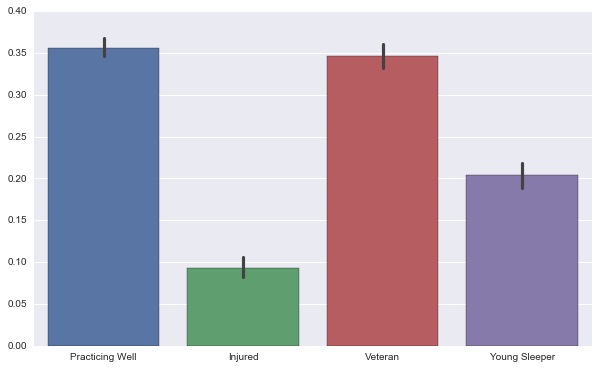

In [1011]:
plt.figure(figsize=(10, 6))
sns.barplot(data = topic_dis)


In [1002]:
# graph for one player
white = topics[topics['player'] == 'Kevin White']
white = white[['topic_0', 'topic_1', 'topic_2', 'topic_3']]
white.columns = ['Practicing Well', 'Injured', 'Veteran', 'Young Sleeper']

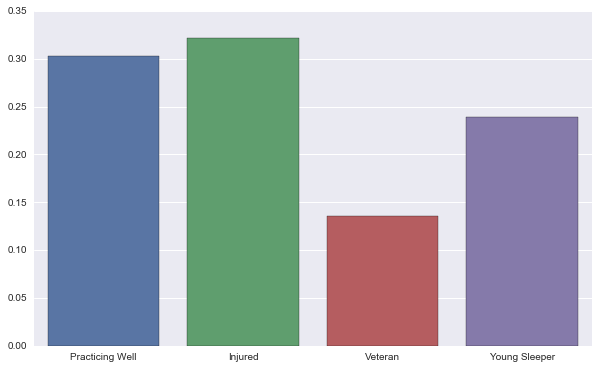

In [1003]:
plt.figure(figsize=(10, 6))
sns.barplot(data = white)

## Taking all the data for regression analysis

In [913]:
# Bring data back from R

train = pd.read_csv('/Users/colekev/Desktop/Metis/train.csv')
test = pd.read_csv('/Users/colekev/Desktop/Metis/test.csv')

# transform social media data for feature selection

train['log_topic_0'] = [np.log(topic) for topic in train.topic_0]
test['log_topic_0'] = [np.log(topic) for topic in test.topic_0]
train['log_topic_1'] = [np.log(topic) for topic in train.topic_1]
test['log_topic_1'] = [np.log(topic) for topic in test.topic_1]
train['log_topic_2'] = [np.log(topic) for topic in train.topic_2]
test['log_topic_2'] = [np.log(topic) for topic in test.topic_2]
train['log_topic_3'] = [np.log(topic) for topic in train.topic_3]
test['log_topic_3'] = [np.log(topic) for topic in test.topic_3]
train['log_tweets'] = [np.log(topic) for topic in train.tweets]
test['log_tweets'] = [np.log(topic) for topic in test.tweets]
train['log_ppr_fpts'] = [np.log(topic) for topic in train.tweets]
test['log_ppr_fpts'] = [np.log(topic) for topic in test.tweets]

train['sq_topic_0'] = [np.power(topic, 2) for topic in train.topic_0]
test['sq_topic_0'] = [np.power(topic, 2) for topic in test.topic_0]
train['sq_topic_1'] = [np.power(topic, 2) for topic in train.topic_1]
test['sq_topic_1'] = [np.power(topic, 2) for topic in test.topic_1]
train['sq_topic_2'] = [np.power(topic, 2) for topic in train.topic_2]
test['sq_topic_2'] = [np.power(topic, 2) for topic in test.topic_2]
train['sq_topic_3'] = [np.power(topic, 2) for topic in train.topic_3]
test['sq_topic_3'] = [np.power(topic, 2) for topic in test.topic_3]
train['sq_tweets'] = [np.power(topic, 2) for topic in train.tweets]
test['sq_tweets'] = [np.power(topic, 2) for topic in test.tweets]
train['sq_ppr_fpts'] = [np.power(topic, 2) for topic in train.tweets]
test['sq_ppr_fpts'] = [np.power(topic, 2) for topic in test.tweets]

In [914]:
train.columns

Index(['player', 'name', 'year', 'avg_pick', 'tweets', 'total_tweets',
       'tweet_ratio', 'polarity', 'subjectivity', 'topic_0', 'topic_1',
       'topic_2', 'topic_3', 'pos', 'ppr_fpts', 'gms', 'exp', 'fpts_per',
       'prior_fpts', 'prior_fpts_per', 'log_topic_0', 'log_topic_1',
       'log_topic_2', 'log_topic_3', 'log_tweets', 'log_ppr_fpts',
       'sq_topic_0', 'sq_topic_1', 'sq_topic_2', 'sq_topic_3', 'sq_tweets',
       'sq_ppr_fpts'],
      dtype='object')

### Lasso to find features

In [974]:
features = ['tweets',
       'tweet_ratio', 'polarity', 'subjectivity', 'topic_0', 'topic_1',
       'topic_2', 'topic_3', 'avg_pick']

In [975]:
X_train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [976]:
y_train = X_train.ppr_fpts

In [977]:
X_train = X_train[features]

In [978]:
X_train.columns

Index(['tweets', 'tweet_ratio', 'polarity', 'subjectivity', 'topic_0',
       'topic_1', 'topic_2', 'topic_3', 'avg_pick'],
      dtype='object')

In [979]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)

In [980]:
from sklearn.linear_model import Lasso

rgr = Lasso(alpha=7)
rgr.fit(X_train_scaled, y_train)

for i in range(len(X_train.columns)):
    print(X_train.columns[i], rgr.coef_[i])

tweets 1.61166760994
tweet_ratio 0.0
polarity 0.0
subjectivity -0.463059738444
topic_0 -0.0
topic_1 -10.2790596456
topic_2 0.0
topic_3 0.0
avg_pick -35.9189069266


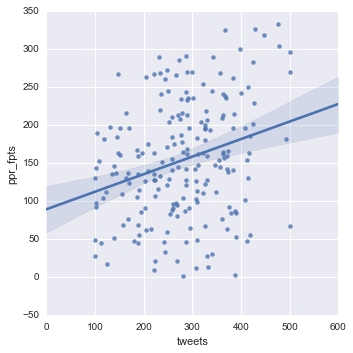

In [965]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show the results of a linear regression within each dataset
sns.lmplot(x="tweets", y="ppr_fpts", data=train)
#sns.lmplot(x="log_tweets", y="ppr_fpts", data=train)
plt.show()

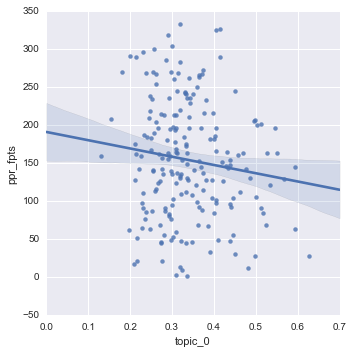

In [966]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="topic_0", y="ppr_fpts", data=train)

plt.show()

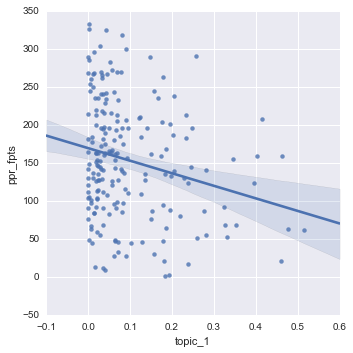

In [967]:
import seaborn as sns

# Show the results of a linear regression within each dataset
sns.lmplot(x="topic_1", y="ppr_fpts", data=train)

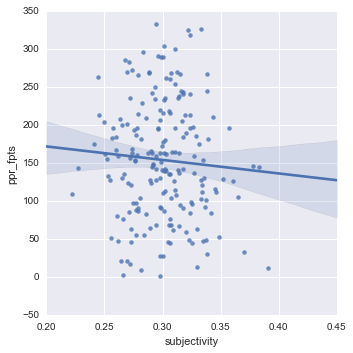

In [969]:
sns.lmplot(x="subjectivity", y="ppr_fpts", data=train)

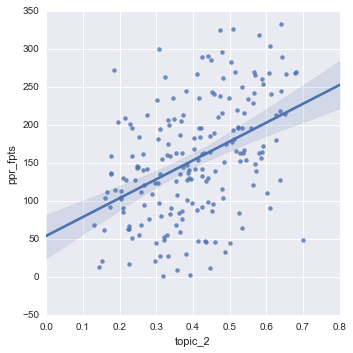

In [968]:
sns.lmplot(x="topic_2", y="ppr_fpts", data=train)

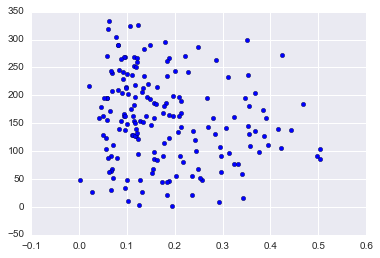

In [560]:
plt.scatter(train['topic_2'], train['ppr_fpts'])

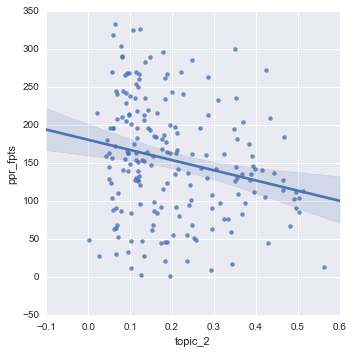

In [737]:
import seaborn as sns

# Show the results of a linear regression within each dataset
sns.lmplot(x="topic_2", y="ppr_fpts", data=train)

In [728]:
import statsmodels.api as sm
from patsy import dmatrices

# Using social media info and prior year fantasy points
y, X = dmatrices('ppr_fpts ~ log_topic_0+topic_1+prior_fpts_per', data=train, return_type='dataframe')


model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ppr_fpts   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     19.31
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           7.35e-11
Time:                        09:02:54   Log-Likelihood:                -1009.1
No. Observations:                 179   AIC:                             2026.
Df Residuals:                     175   BIC:                             2039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        -14.5947     23.957     -0.609      0.543       -61.877    32.688
log_topic_0      -29.6248     11.904     -2.489      0.014       -53.119    -6.131
topic_1           66.2471     58.347      1.135      0.258       -48.908   181.402
prior_fpts_per     6.6107      1.662      3.978      0.000         3.331     9.890
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                1.043
Skew:                          -0.086   Prob(JB):                        0.594
Kurtosis:                       2.667   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [729]:
from sklearn.metrics import mean_squared_error

y_test, X_test = dmatrices('ppr_fpts ~ log_topic_0+topic_1+prior_fpts_per', data=test, return_type='dataframe')

In [730]:
#Using adp_post only
predictions = results.predict(X_test)
# Compute the error.
print(np.sqrt(mean_squared_error(predictions, np.ravel(y_test))))

67.128933731


### Looking At Only Social Media Versus Average

In [707]:
mean = np.full((1, len(y_test)), np.mean(y))
print(np.sqrt(mean_squared_error(mean[0], np.ravel(y_test))))

81.4974548375


### Looking at only social media

In [973]:
y, X = dmatrices('ppr_fpts ~ tweets+subjectivity+topic_0+topic_1+topic_2', data=train, return_type='dataframe')


model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ppr_fpts   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     13.56
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           2.45e-11
Time:                        11:00:51   Log-Likelihood:                -1116.1
No. Observations:                 199   AIC:                             2244.
Df Residuals:                     193   BIC:                             2264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      176.0354     58.036      3.033      0.003        61.569   290.502
tweets           0.1656      0.053      3.140      0.002         0.062     0.270
subjectivity  -346.1087    176.196     -1.964      0.051      -693.626     1.409
topic_0        -77.9055     61.349     -1.270      0.206      -198.907    43.096
topic_1       -127.2353     55.114     -2.309      0.022      -235.938   -18.533
topic_2        182.6002     41.937      4.354      0.000        99.887   265.314
==============================================================================
Omnibus:                        2.257   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                1.745
Skew:                          -0.038   Prob(JB):                        0.418
Kurtosis:                       2.548   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [971]:
test.columns = train.columns

y_test, X_test = dmatrices('ppr_fpts ~ tweets+subjectivity+topic_0+topic_1+topic_2', data=test, return_type='dataframe')

In [972]:
#Using adp_post only
predictions = results.predict(X_test)
# Compute the error.
print(np.sqrt(mean_squared_error(predictions, np.ravel(y_test))))

78.5221253809


### Using Average Draft Position Only

In [632]:
y, X = dmatrices('ppr_fpts ~ prior_fpts_per', data=train, return_type='dataframe')


model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ppr_fpts   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     33.89
Date:                Thu, 08 Sep 2016   Prob (F-statistic):           2.69e-08
Time:                        22:41:45   Log-Likelihood:                -1019.0
No. Observations:                 179   AIC:                             2042.
Df Residuals:                     177   BIC:                             2048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         54.0894     18.567      2.913      0.004        17.448    90.731
prior_fpts_per     8.1951      1.408      5.821      0.000         5.417    10.973
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.273
Skew:                          -0.036   Prob(JB):                        0.529
Kurtosis:                       2.593   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [633]:
y_test, X_test = dmatrices('ppr_fpts ~ prior_fpts_per', data=test, return_type='dataframe')

In [635]:
predictions = results.predict(X_test)
# Compute the error.
print(np.sqrt(mean_squared_error(predictions, np.ravel(y_test))))

70.6046063738


### Average Draft Position with Social Media

In [993]:
y, X = dmatrices('ppr_fpts ~ avg_pick+subjectivity+topic_1', data=train, return_type='dataframe')

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ppr_fpts   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     41.29
Date:                Fri, 09 Sep 2016   Prob (F-statistic):           1.06e-20
Time:                        11:38:23   Log-Likelihood:                -1097.1
No. Observations:                 199   AIC:                             2202.
Df Residuals:                     195   BIC:                             2215.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      351.0225     48.288      7.269      0.000       255.789   446.256
avg_pick        -0.8212      0.082    -10.073      0.000        -0.982    -0.660
subjectivity  -347.0591    154.597     -2.245      0.026      -651.956   -42.162
topic_1       -164.9218     42.089     -3.918      0.000      -247.930   -81.913
==============================================================================
Omnibus:                        0.604   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.710
Skew:                          -0.121   Prob(JB):                        0.701
Kurtosis:                       2.836   Cond. No.                     4.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [990]:
y_test, X_test = dmatrices('ppr_fpts ~ avg_pick+subjectivity+topic_1', data=test, return_type='dataframe')

In [991]:
predictions = results.predict(X_test)
# Compute the error.
print(np.sqrt(mean_squared_error(predictions, np.ravel(y_test))))

64.9455547505


In [99]:
X_test.shape

(131, 2)

## Random Forrest

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=250)
rfc.fit(X, np.ravel(y))
print(rfc.score(X, y))
# Make predictions.
predictions = rfc.predict(X_test)
# Compute the error.
print(mean_squared_error(predictions, np.ravel(y_test)))

0.907463265714
4139.43230137


In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=250)
rfc.fit(X, np.ravel(y))
print(rfc.score(X, y))
# Make predictions.
predictions = rfc.predict(X_test)
# Compute the error.
print(mean_squared_error(predictions, np.ravel(y_test)))

0.893309300747
3857.13085644


In [47]:
for i in range(len(rfc.feature_importances_)):
    print(X_train.columns[i], rfc.feature_importances_[i])

adp_pre 0.0924448264001
adp_post 0.106507974838
adpChange 0.0413743641902
adpChangeScaled 0.022730419337
tweets 0.0539864312787
per_pos 0.027329137401
net_pos 0.0294451896285
pos_mean 0.0156732082903
topic_0 0.0344724233907
topic_1 0.0353239770677
topic_2 0.111527255759
topic_3 0.0396971501381
exp 0.0307892961176
prior_fpts 0.269557559513
QB 0.0723396028177
RB 0.00500974285227
TE 0.00184359788917
WR 0.00994784309126
